<a href="https://colab.research.google.com/github/Danish-2003/PrimeTradeAIAssignment/blob/main/PrimeTradeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Inspection

**Step 1**
1. number of rows/columns
2. missing values / duplicates

**Step 2**
1. Convert timestamps and align the datasets by date (daily level is fine).

2. Create the key metrics you will analyze,for example:

- daily PnL per trader (or per account)
- win rate, average trade size
- leverage distribution
- number of trades per day
- long/short ratio


**Step 1**

In [26]:
df_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PrimetradeDotAi/Data/fear_greed_index.csv')
df_trader = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PrimetradeDotAi/Data/historical_data.csv')

In [27]:
#  Converting Headers to lowercase for ease
df_sentiment = df_sentiment.rename(columns=str.lower)
df_trader = df_trader.rename(columns=str.lower)

In [28]:
df_sentiment.shape

(2644, 4)

In [29]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [30]:
df_trader.shape

(211224, 16)

In [33]:
df_trader.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [34]:
# standardize column names
df_sentiment.columns = df_sentiment.columns.str.lower().str.strip()
df_trader.columns = df_trader.columns.str.lower().str.strip().str.replace(" ", "_")

df_trader.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [35]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [36]:
df_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   account           211224 non-null  object 
 1   coin              211224 non-null  object 
 2   execution_price   211224 non-null  float64
 3   size_tokens       211224 non-null  float64
 4   size_usd          211224 non-null  float64
 5   side              211224 non-null  object 
 6   timestamp_ist     211224 non-null  object 
 7   start_position    211224 non-null  float64
 8   direction         211224 non-null  object 
 9   closed_pnl        211224 non-null  float64
 10  transaction_hash  211224 non-null  object 
 11  order_id          211224 non-null  int64  
 12  crossed           211224 non-null  bool   
 13  fee               211224 non-null  float64
 14  trade_id          211224 non-null  float64
 15  timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [37]:
# checking for missing data
print(f"Sentiment - {df_sentiment.isnull().sum()}")
print('-'*21)
print(f"Historical - {df_trader.isnull().sum()}")

Sentiment - timestamp         0
value             0
classification    0
date              0
dtype: int64
---------------------
Historical - account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
dtype: int64


In [38]:
# checking for duplicates
df_trader.duplicated().sum()
df_sentiment.duplicated().sum()

np.int64(0)

**Step 2**

In [39]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_trader['timestamp_ist'] = pd.to_datetime(
    df_trader['timestamp_ist'],
    format='%d-%m-%Y %H:%M'
)

df_trader['date'] = df_trader['timestamp_ist'].dt.date
df_trader['date'] = pd.to_datetime(df_trader['date'])

In [40]:
df = df_trader.merge(
    df_sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)

print("Unmatched sentiment rows:", df['classification'].isna().sum())

Unmatched sentiment rows: 6


In [60]:
# daily pnl per account
daily_pnl = (
    df.groupby(['account', 'date', 'sentiment_group'])['closed_pnl']
    .sum()
    .reset_index()
)

In [61]:
# win rate
df['win'] = df['closed_pnl'] > 0

win_rate = (
    df.groupby('account')['win']
    .mean()
    .reset_index(name='win_rate')
)

In [62]:
# trade per day
trades_per_day = (
    df.groupby(['account', 'date'])
    .size()
    .reset_index(name='trades_count')
)

In [63]:
# avg trade size
avg_size = (
    df.groupby('account')['size_usd']
    .mean()
    .reset_index(name='avg_trade_size_usd')
)

In [64]:
# long short ratio
df['side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [65]:
side_ratio = (
    df.groupby(['date', 'classification', 'side'])
    .size()
    .reset_index(name='count')
)

In [66]:
pivot = side_ratio.pivot_table(
    index=['date','classification'],
    columns='side',
    values='count',
    fill_value=0
).reset_index()

pivot['long_short_ratio'] = pivot.get('BUY',0) / (pivot.get('SELL',1))

In [67]:
# pnl comparision
df['sentiment_group'] = df['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

In [68]:
# comparing mean pnl
df.groupby('sentiment_group')['closed_pnl'].agg(['mean','median','std','count'])

,mean,median,std,count
sentiment_group,,,,
Fear,49.212077,0.0,990.875398,83237
Greed,53.882281,0.0,976.964281,90295
Neutral,34.307718,0.0,517.122220,37686


In [69]:
# comparing win rate
df.groupby('sentiment_group')['win'].mean()

,win
sentiment_group,
Fear,0.407871
Greed,0.420311
Neutral,0.396991


In [70]:
# trade freq by sentiment
df.groupby('sentiment_group').size()

,0
sentiment_group,
Fear,83237
Greed,90295
Neutral,37686


In [71]:
# avg position size
df.groupby('sentiment_group')['size_usd'].mean()

,size_usd
sentiment_group,
Fear,7182.011019
Greed,4574.424490
Neutral,4782.732661


In [72]:
# trading intensity
df.groupby('sentiment_group')['fee'].mean()

,fee
sentiment_group,
Fear,1.397763
Greed,0.998166
Neutral,1.044798


# Segment traders

In [73]:
# high vs low pnl traders
account_pnl = df.groupby('account')['closed_pnl'].sum()

median_pnl = account_pnl.median()

df['pnl_segment'] = df['account'].map(
    lambda x: 'High_PnL' if account_pnl[x] > median_pnl else 'Low_PnL'
)

In [74]:
# frequent vs Infrequent
trade_counts = df.groupby('account').size()
median_trades = trade_counts.median()

df['activity_segment'] = df['account'].map(
    lambda x: 'High_Activity' if trade_counts[x] > median_trades else 'Low_Activity'
)

In [75]:
df.groupby(['activity_segment','sentiment_group'])['closed_pnl'].mean()

activity_segment  sentiment_group
High_Activity     Fear                47.325875
                  Greed               41.476621
                  Neutral             34.579701
Low_Activity      Fear                61.968833
                  Greed              155.896341
                  Neutral             31.845656
Name: closed_pnl, dtype: float64

In [79]:
# Account volatility (std of daily pnl)
account_volatility = (
    daily_pnl.groupby('account')['closed_pnl']
    .std()
)

median_vol = account_volatility.median()

df['consistency_segment'] = df['account'].map(
    lambda x: 'Inconsistent' if account_volatility[x] > median_vol else 'Consistent'
)

df.groupby(['consistency_segment','sentiment_group'])['closed_pnl'].mean()

consistency_segment  sentiment_group
Consistent           Fear                5.961326
                     Greed              26.485981
                     Neutral             7.895677
Inconsistent         Fear               61.148235
                     Greed              95.083090
                     Neutral            52.357382
Name: closed_pnl, dtype: float64

Leverage data was not available in the trader dataset, so leverage-based analysis could not be performed.

In [76]:
# ---- Drawdown Proxy ----

daily_pnl = daily_pnl.sort_values(['account', 'date'])

daily_pnl['cum_pnl'] = (
    daily_pnl.groupby('account')['closed_pnl'].cumsum()
)

daily_pnl['rolling_max'] = (
    daily_pnl.groupby('account')['cum_pnl'].cummax()
)

daily_pnl['drawdown'] = (
    daily_pnl['cum_pnl'] - daily_pnl['rolling_max']
)

# Compare drawdown
daily_pnl.groupby('sentiment_group')['drawdown'].mean()

,drawdown
sentiment_group,
Fear,-8863.193211
Greed,-8892.618794
Neutral,-9431.377301



# Insight Plots

**Frequent vs Infrequent Traders**

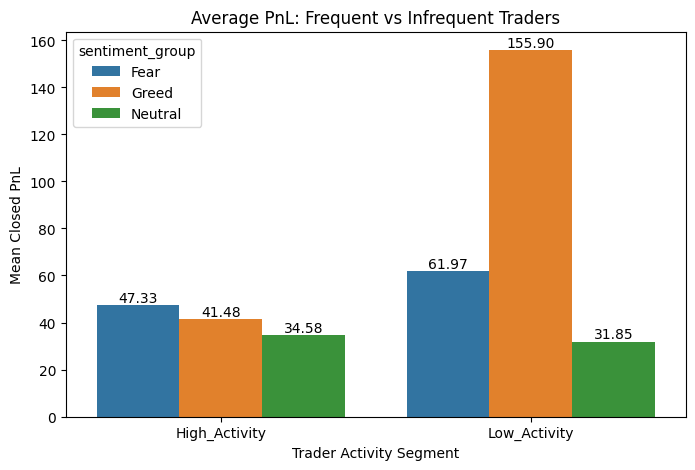

In [84]:
activity_perf = (
    df.groupby(['activity_segment','sentiment_group'])['closed_pnl']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=activity_perf,
    x='activity_segment',
    y='closed_pnl',
    hue='sentiment_group'
)

plt.title("Average PnL: Frequent vs Infrequent Traders")
plt.ylabel("Mean Closed PnL")
plt.xlabel("Trader Activity Segment")
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f')
plt.show()

**High vs Low PnL Traders**

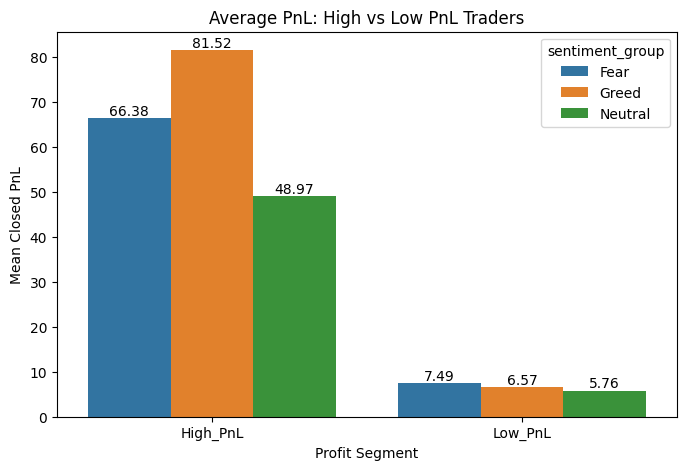

In [85]:
pnl_segment_perf = (
    df.groupby(['pnl_segment','sentiment_group'])['closed_pnl']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=pnl_segment_perf,
    x='pnl_segment',
    y='closed_pnl',
    hue='sentiment_group'
)

plt.title("Average PnL: High vs Low PnL Traders")
plt.ylabel("Mean Closed PnL")
plt.xlabel("Profit Segment")
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f')
plt.show()

**Consistent vs Inconsistent Traders**

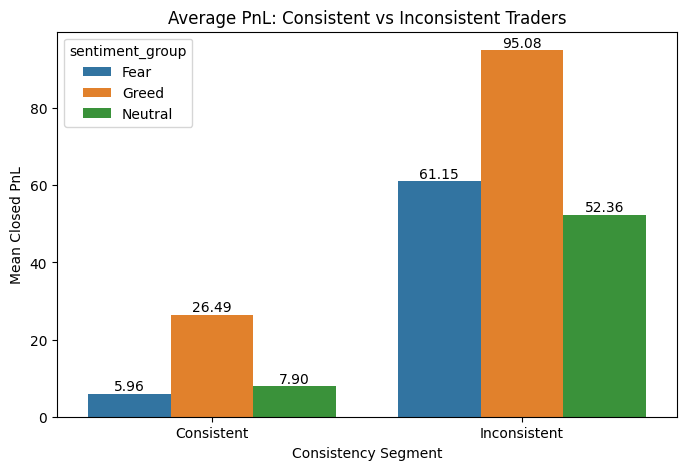

In [86]:
consistency_perf = (
    df.groupby(['consistency_segment','sentiment_group'])['closed_pnl']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=consistency_perf,
    x='consistency_segment',
    y='closed_pnl',
    hue='sentiment_group'
)

plt.title("Average PnL: Consistent vs Inconsistent Traders")
plt.ylabel("Mean Closed PnL")
plt.xlabel("Consistency Segment")
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f')
plt.show()

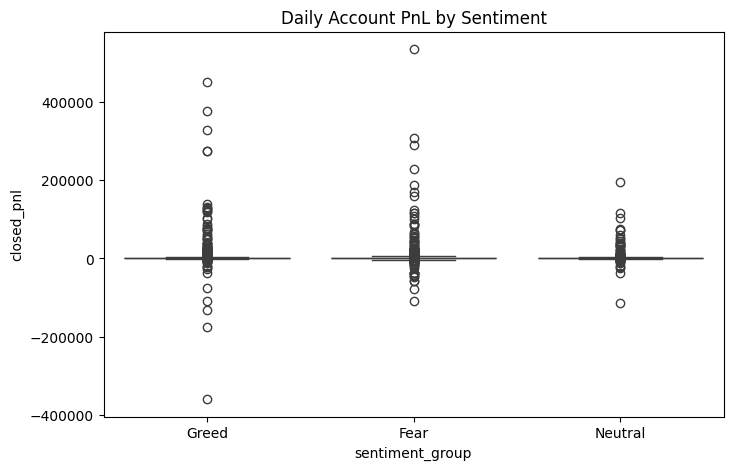

In [87]:
# Daily pnl distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=daily_pnl, x='sentiment_group', y='closed_pnl',hue='sentiment_group')
plt.title("Daily Account PnL by Sentiment")
plt.show()

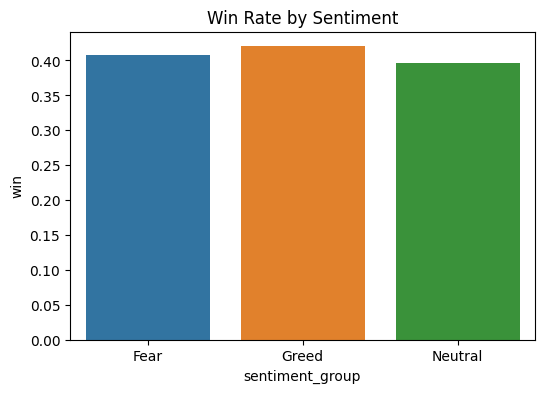

In [88]:
win_plot = df.groupby('sentiment_group')['win'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=win_plot, x='sentiment_group', y='win',hue='sentiment_group')
plt.title("Win Rate by Sentiment")
plt.show()

In [78]:
from scipy.stats import ttest_ind

fear_pnl = daily_pnl[daily_pnl['sentiment_group']=='Fear']['closed_pnl']
greed_pnl = daily_pnl[daily_pnl['sentiment_group']=='Greed']['closed_pnl']

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 0.7429643782970919
P-value: 0.45761118078494323


# **Insights**

- Insight 1 — Greed Amplifies Profitability, Especially for Low-Activity Traders

Low-activity traders generate ~156 mean PnL during Greed vs ~62 during Fear.

This suggests:
Greed periods reward selective positioning rather than high trade frequency.

- Insight 2 - Frequent Trading Does Not Improve Performance in Greed

High-activity traders show only marginal improvement in Greed.

This implies:
Overtrading during optimistic markets may dilute edge.

- Insight - 3 Inconsistent (High-Volatility) Traders Benefit More from Greed

Inconsistent traders show very high Greed PnL (~95).

This suggests:
Risk-seeking behavior performs better in bullish sentiment.

# **Strategies**

**Strategy 1** : Expand Risk Selectively During Greed

**Evidence:**

Higher average PnL during Greed.

Low-activity and High-PnL traders perform best in Greed.

Win rate slightly higher in Greed.

**Rule :**
During Greed days:

Increase position size for historically profitable traders.

Favor selective trades over high trade frequency.

Avoid overtrading.

-----------------------------------------------------------

**Strategy 2** : Defensive Allocation During Fear

**Evidence:**

Lower average profitability in Fear.

High-volatility traders show unstable performance.

Consistent traders perform relatively better in Fear.

**Rule** :
During Fear days:

Reduce position size and risk exposure.

Allocate more capital to consistent traders.

Limit exposure to high-volatility trading behavior.

# Simple Predictive Model

In [90]:
daily_pnl = (
    df.groupby(['account', 'date', 'sentiment_group'])
    ['closed_pnl']
    .sum()
    .reset_index()
)

In [91]:
daily_pnl = daily_pnl.sort_values(['account', 'date'])

daily_pnl['next_day_pnl'] = (
    daily_pnl.groupby('account')['closed_pnl']
    .shift(-1)
)

daily_pnl['target'] = (daily_pnl['next_day_pnl'] > 0).astype(int)

daily_pnl = daily_pnl.dropna(subset=['next_day_pnl'])

In [92]:
daily_pnl['rolling_vol'] = (
    daily_pnl.groupby('account')['closed_pnl']
    .rolling(3)
    .std()
    .reset_index(level=0, drop=True)
)

daily_pnl['rolling_vol'] = daily_pnl['rolling_vol'].fillna(0)

In [93]:
daily_pnl = pd.get_dummies(
    daily_pnl,
    columns=['sentiment_group'],
    drop_first=True
)

In [94]:
features = [
    'closed_pnl',
    'rolling_vol'
] + [col for col in daily_pnl.columns if 'sentiment_group_' in col]

X = daily_pnl[features]
y = daily_pnl['target']

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.6233766233766234
ROC AUC: 0.543183269476373
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       174
           1       0.62      1.00      0.77       288

    accuracy                           0.62       462
   macro avg       0.31      0.50      0.38       462
weighted avg       0.39      0.62      0.48       462



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Sentiment and recent trader behavior have modest predictive power for next-day profitability.**

# **Trader Performance vs Market Sentiment**

Objective :

To evaluate how Bitcoin market sentiment (Fear/Greed regime) influences trader behavior and profitability on Hyperliquid, and to derive regime-aware capital allocation strategies.

### Methodology :

**Data Alignment**

- Normalized timestamps to daily level

- Merged trader execution data with daily sentiment classification

- Aggregated account-level daily PnL

- Performance Metrics

- Daily PnL (account-level)

- Win rate

- Drawdown proxy (cumulative PnL vs rolling peak)

- Behavioral Features

- Trade frequency

- Average position size (USD)

- Long/Short ratio

- Rolling volatility (3-day std)

- Segmentation Framework

- High vs Low Activity traders

- High vs Low PnL traders

**Consistent vs Inconsistent (volatility-based) traders**

**Optional:**

Logistic regression model predicting next-day profitability.

-- Empirical Findings

- Greed Regime Amplifies Returns
- Average profitability is higher during Greed periods. The magnitude of   returns increases more than the probability of winning (win rate differences are marginal).

- Selective Participation Outperforms Overtrading
- Low-activity traders significantly outperform high-frequency traders during Greed, suggesting that selective positioning is more effective than increased trade count.

- Volatility-Seeking Behavior Benefits in Greed
- Inconsistent (high-volatility) traders capture larger upside in Greed regimes, indicating risk-on dynamics. However, this behavior introduces instability during Fear.

Regime Impacts Return Dispersion More Than Hit Rate
Sentiment affects return magnitude and variance more strongly than directional accuracy.

## Strategy Implications :
- Regime-Aware Risk Expansion

During Greed:

Increase capital allocation to historically profitable traders.

Allow moderate expansion in position size.

Avoid excessive trade frequency; prioritize conviction trades.

- Defensive Risk Compression

During Fear:

- Reduce exposure and position sizing.

- Allocate capital toward consistent (low-volatility) traders.

- Restrict capital allocation to high-volatility accounts.

Predictive Modeling (Exploratory)

A logistic regression model using sentiment, rolling volatility, and prior-day PnL shows modest predictive signal for next-day profitability.

This suggests:

Sentiment and behavioral features provide incremental edge.

However, trader performance remains highly stochastic.

**Conclusion**

Market sentiment functions as a risk regime classifier rather than a directional predictor.
Its primary effect is on return dispersion and capital efficiency across trader segments.
